In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [137]:
b = 8/3
s = 10
r = 28
x0 = y0 = z0 = 1
t_lower = 0
t_upper = 50

In [138]:
def dx(x, y, z):
    return -s * (x - y)

def dy(x, y, z):
    return -x * z + r * x - y

def dz(x, y, z):
    return x * y - b * z

def dF(v):
    return np.array([df(v[0],v[1],v[2]) for df in [dx, dy, dz]])

In [213]:
h = 1e-4
t_space = np.arange(t_lower, t_upper + h, h)
n = len(t_space)

In [214]:
def table(sol):

    dF_v = dF(sol)
    sol_table = pd.DataFrame(data={"t" : t_space, \
                                   "x" : sol[0], \
                                   "y" : sol[1], \
                                   "z" : sol[2], \
                                   "dx/dt" : dF_v[0], \
                                   "dy/dt" : dF_v[1], \
                                   "dz/dt" : dF_v[2]})
    return sol_table



def plots(sol):

    import matplotlib.colors as mcolors
    from random import choice

    colors = list(mcolors.TABLEAU_COLORS.values())

    dF_v = dF(sol)

    fig, ax = plt.subplots(3, 2, figsize=(20,20))

    f_names = ['x', 'y', 'z']

    for i, f_name in enumerate(f_names):
        ax[i][0].set_title("{}(t)".format(f_name), fontsize=18)
        ax[i][1].set_title("Phase space {0}, d{0}/dt".format(f_name), fontsize=18)
        ax[i][0].plot(t_space, sol[i], c=choice(colors))
        ax[i][1].plot(sol[i], dF_v[i], c=choice(colors))

    plt.show()

# 1st order forward Euler method

In [215]:
def euler_method():
    
    F = np.zeros((n, 3))
    F[0] = np.array([x0, y0, z0])
    
    for i in range(1, n):
        dF_v = dF(F[i-1])
        for j in range(3):
            F[i][j] = F[i-1][j] + dF_v[j] * h
    
    return F

In [216]:
sol = euler_method().T

In [217]:
pd.set_option("display.precision", 3)
table(sol)

,t,x,y,z,dx/dt,dy/dt,dz/dt
0,0.000e+00,1.000,1.000,1.000,-0.000,26.000,-1.667
1,1.000e-04,1.000,1.003,1.000,0.026,25.998,-1.664
2,2.000e-04,1.000,1.005,1.000,0.052,25.995,-1.661
3,3.000e-04,1.000,1.008,1.000,0.078,25.993,-1.658
4,4.000e-04,1.000,1.010,0.999,0.104,25.991,-1.654
...,...,...,...,...,...,...,...
499996,5.000e+01,5.879,1.980,29.016,-38.982,-7.950,-65.733
499997,5.000e+01,5.875,1.980,29.009,-38.951,-7.907,-65.728
499998,5.000e+01,5.871,1.979,29.002,-38.920,-7.864,-65.723
499999,5.000e+01,5.867,1.978,28.996,-38.889,-7.820,-65.718


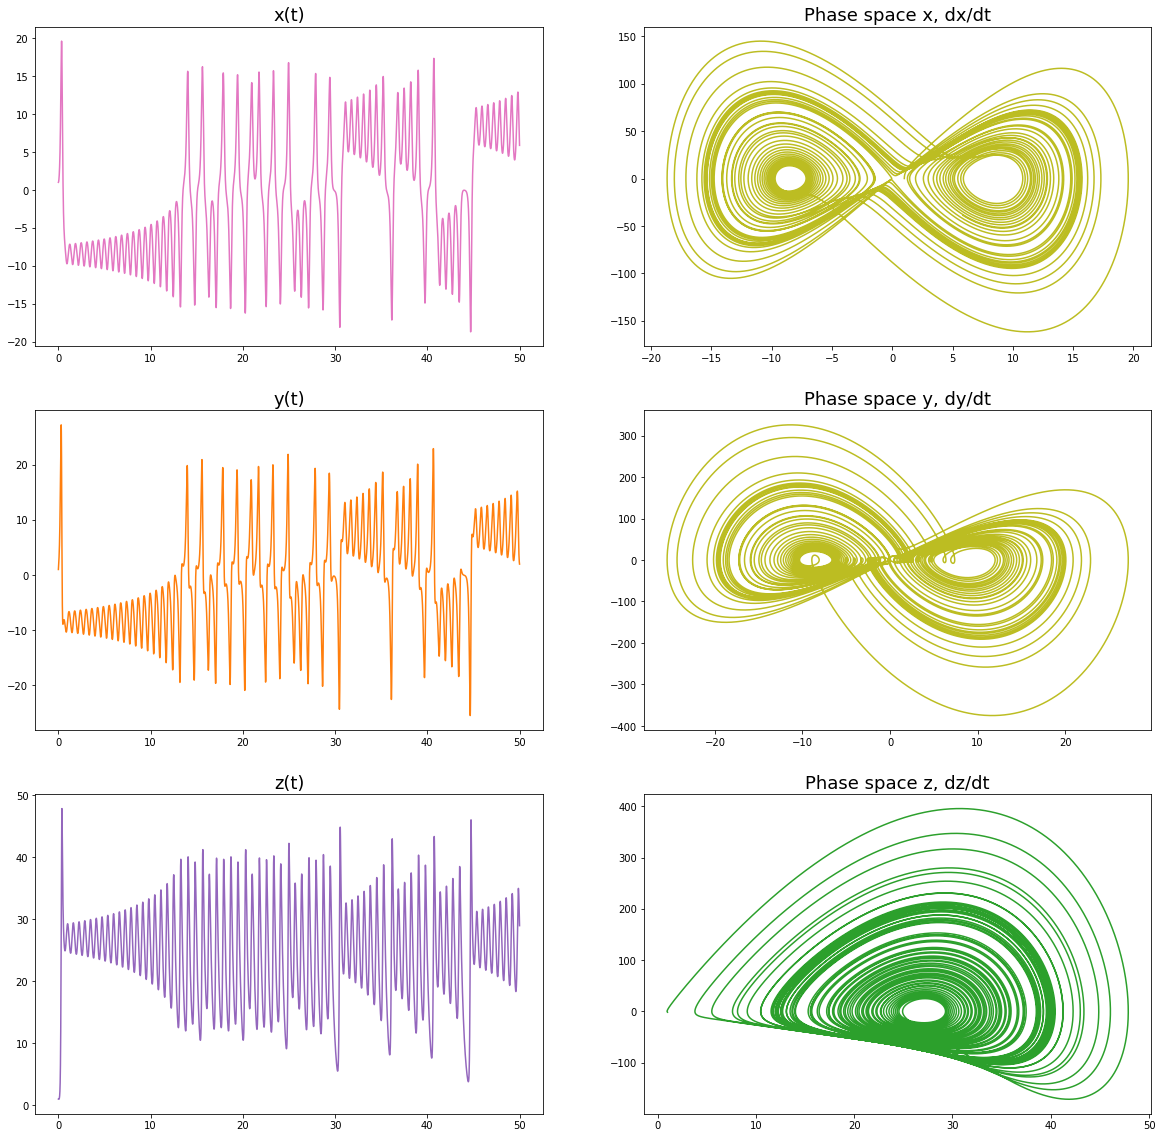

In [218]:
plots(sol)

# 2nd order forward Heun's method

In [219]:
def heun():
    F = np.zeros((n, 3))
    F[0] = np.array([x0, y0, z0])
    
    for i in range(1, n):
        dF_v1 = dF(F[i-1])
        dF_v2 = dF(F[i-1] + h * dF_v1)
        for j in range(3):
            F[i][j] = F[i-1][j] + (dF_v1[j] + dF_v2[j]) / 2 * h
    
    return F

In [220]:
sol = heun().T

In [221]:
pd.set_option("display.precision", 3)
table(sol)

,t,x,y,z,dx/dt,dy/dt,dz/dt
0,0.000e+00,1.000,1.000,1.000,-0.000,26.000,-1.667
1,1.000e-04,1.000,1.003,1.000,0.026,25.998,-1.664
2,2.000e-04,1.000,1.005,1.000,0.052,25.995,-1.661
3,3.000e-04,1.000,1.008,1.000,0.078,25.993,-1.658
4,4.000e-04,1.000,1.010,0.999,0.104,25.991,-1.654
...,...,...,...,...,...,...,...
499996,5.000e+01,-6.903,-11.267,16.276,-43.643,-69.661,34.375
499997,5.000e+01,-6.907,-11.274,16.280,-43.669,-69.682,34.463
499998,5.000e+01,-6.912,-11.281,16.283,-43.695,-69.702,34.551
499999,5.000e+01,-6.916,-11.288,16.287,-43.721,-69.723,34.640


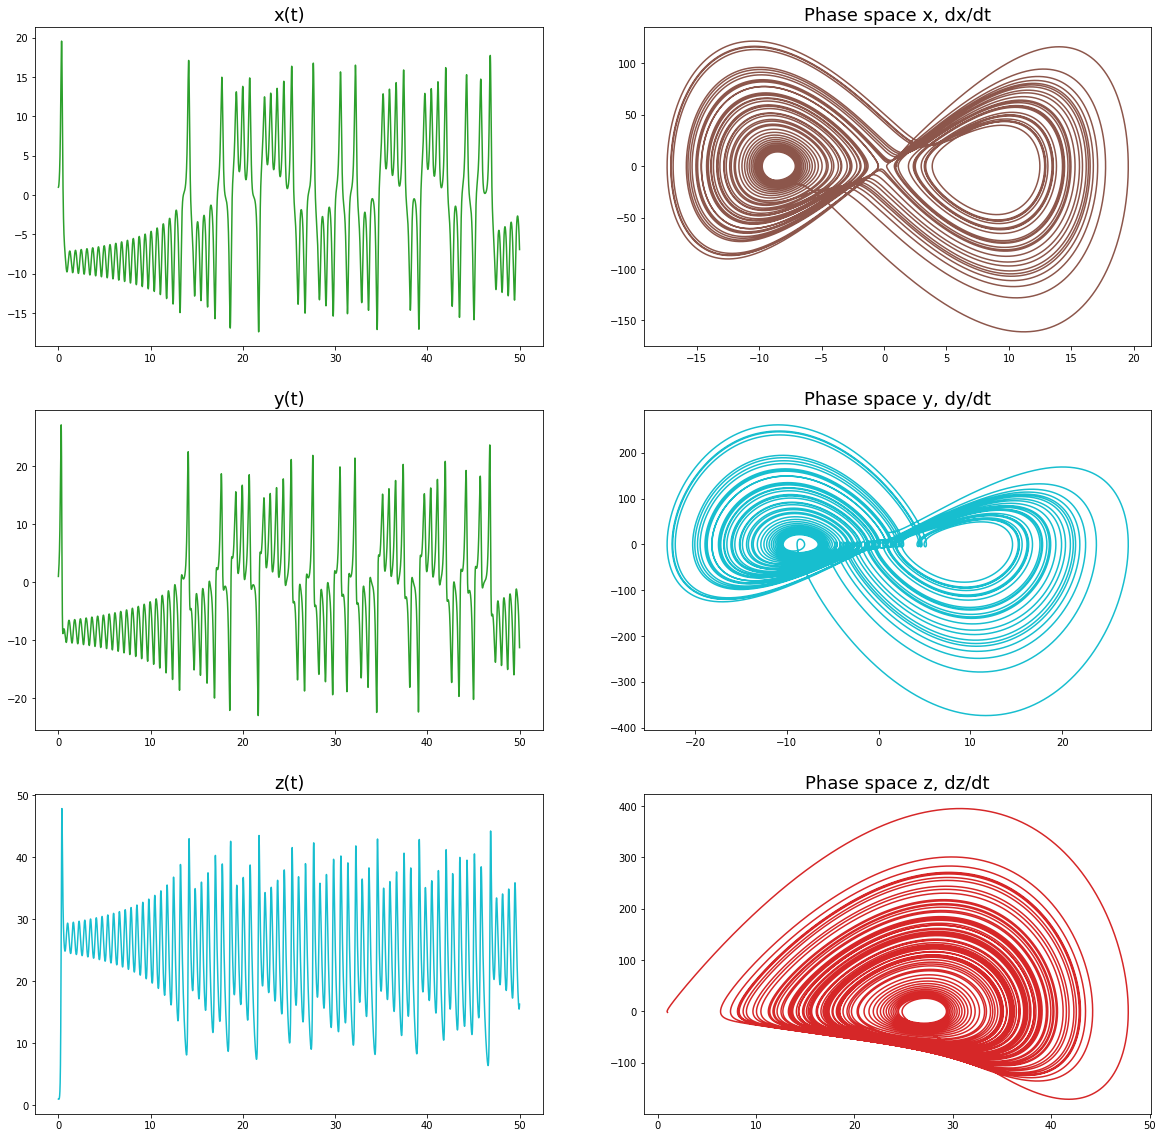

In [222]:
plots(sol)

# 4th order forward Runge-Kutta method

In [223]:
def runge_kutta():
    F = np.zeros((n, 3))
    F[0] = np.array([x0, y0, z0])
    
    for i in range(1, n):

        k1 = h * dF(F[i-1])
        k2 = h * dF(F[i-1] + k1/2)
        k3 = h * dF(F[i-1] + k2/2)
        k4 = h * dF(F[i-1] + k3)

        for j in range(3):
            F[i][j] = F[i-1][j] + (k1[j] + 2 * (k2[j] + k3[j]) + k4[j]) / 6
    
    return F

In [224]:
sol = runge_kutta().T

In [226]:
pd.set_option("display.precision", 3)
table(sol)

,t,x,y,z,dx/dt,dy/dt,dz/dt
0,0.000e+00,1.000,1.000,1.000,-0.000,26.000,-1.667
1,1.000e-04,1.000,1.003,1.000,0.026,25.998,-1.664
2,2.000e-04,1.000,1.005,1.000,0.052,25.995,-1.661
3,3.000e-04,1.000,1.008,1.000,0.078,25.993,-1.658
4,4.000e-04,1.000,1.010,0.999,0.104,25.991,-1.654
...,...,...,...,...,...,...,...
499996,5.000e+01,0.987,1.748,14.337,7.610,11.739,-36.505
499997,5.000e+01,0.988,1.749,14.333,7.614,11.752,-36.493
499998,5.000e+01,0.989,1.750,14.329,7.618,11.764,-36.481
499999,5.000e+01,0.989,1.752,14.326,7.622,11.777,-36.469


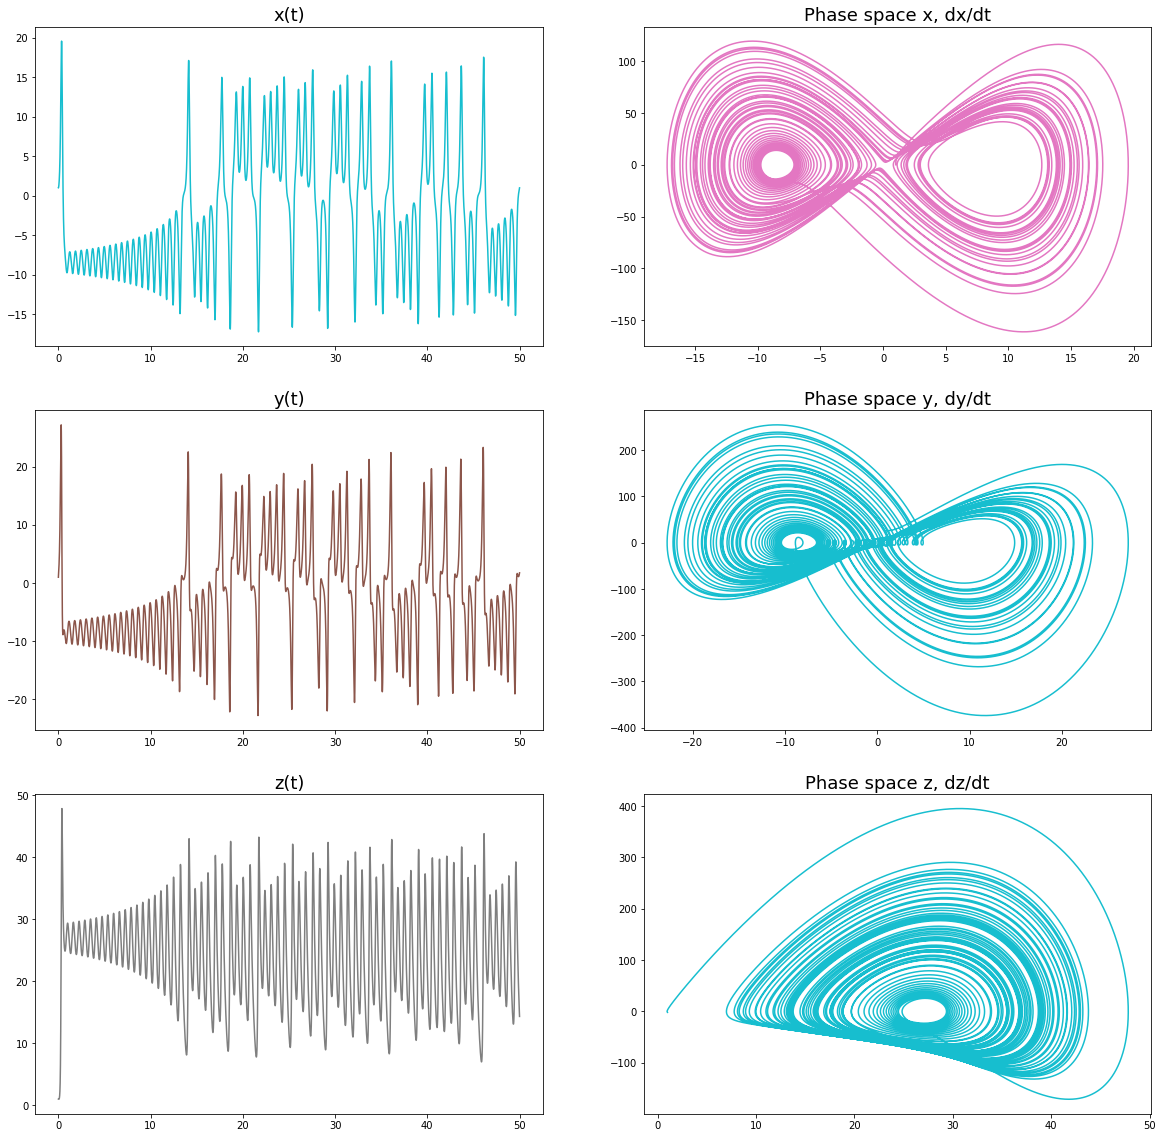

In [227]:
plots(sol)